In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 

In [18]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [19]:
Complete_secure_df = pd.read_csv("Complete_Secure_Dataset.csv")

In [20]:
Complete_secure_df.sort_values("email_id").head()

,Unnamed: 0,Bounce Type,Hard Bounces,Member_Rating,Opens,Soft Bounces,Successful Deliveries,Total Bounces,Total Recipients,campaign_id,email_id,Subject
9894,9894,soft,14.0,1.0,0.0,14.0,170.0,28.0,198.0,8,0,Disrupt with JOY! Parade For Love Next Sunday
2988,2988,sent,6.0,2.0,0.0,31.0,1723.0,37.0,1760.0,2,0,FRIDAY NIGHT - Escape The Planet // OFF TO SPACE
10277,10277,sent,0.0,2.0,0.0,29.0,307.0,29.0,336.0,12,0,PARADE FOR LOVE THIS SATURDAY - #FreeHugsNYC A...
373,373,sent,16.0,2.0,0.0,39.0,1784.0,55.0,1839.0,1,0,Register as a member before New Years to get y...
4639,4639,sent,144.0,2.0,0.0,46.0,1700.0,190.0,1890.0,3,0,10 year anniversary of FREE HUGS NYC - Come ou...


In [21]:
Complete_secure_df.drop("Unnamed: 0", axis=1, inplace=True)

In [22]:
Complete_secure_df.sort_values("Member_Rating", ascending=False)

,Bounce Type,Hard Bounces,Member_Rating,Opens,Soft Bounces,Successful Deliveries,Total Bounces,Total Recipients,campaign_id,email_id,Subject
0,sent,16.0,4.0,1.0,39.0,1784.0,55.0,1839.0,1,1282,Register as a member before New Years to get y...
6506,sent,45.0,4.0,1.0,9.0,1594.0,54.0,1648.0,5,88,10 year anniversary of FREE HUGS NYC - Come ou...
6561,sent,45.0,4.0,1.0,9.0,1594.0,54.0,1648.0,5,688,10 year anniversary of FREE HUGS NYC - Come ou...
6560,sent,45.0,4.0,2.0,9.0,1594.0,54.0,1648.0,5,1070,10 year anniversary of FREE HUGS NYC - Come ou...
6559,sent,45.0,4.0,1.0,9.0,1594.0,54.0,1648.0,5,377,10 year anniversary of FREE HUGS NYC - Come ou...
6556,sent,45.0,4.0,1.0,9.0,1594.0,54.0,1648.0,5,489,10 year anniversary of FREE HUGS NYC - Come ou...
6553,sent,45.0,4.0,1.0,9.0,1594.0,54.0,1648.0,5,647,10 year anniversary of FREE HUGS NYC - Come ou...
6550,sent,45.0,4.0,1.0,9.0,1594.0,54.0,1648.0,5,500,10 year anniversary of FREE HUGS NYC - Come ou...
6547,sent,45.0,4.0,2.0,9.0,1594.0,54.0,1648.0,5,441,10 year anniversary of FREE HUGS NYC - Come ou...
651,sent,16.0,4.0,0.0,39.0,1784.0,55.0,1839.0,1,204,Register as a member before New Years to get y...


In [23]:
Complete_secure_df.dtypes

Bounce Type               object
Hard Bounces             float64
Member_Rating            float64
Opens                    float64
Soft Bounces             float64
Successful Deliveries    float64
Total Bounces            float64
Total Recipients         float64
campaign_id                int64
email_id                   int64
Subject                   object
dtype: object

In [24]:
Complete_secure_df.shape

(11577, 11)

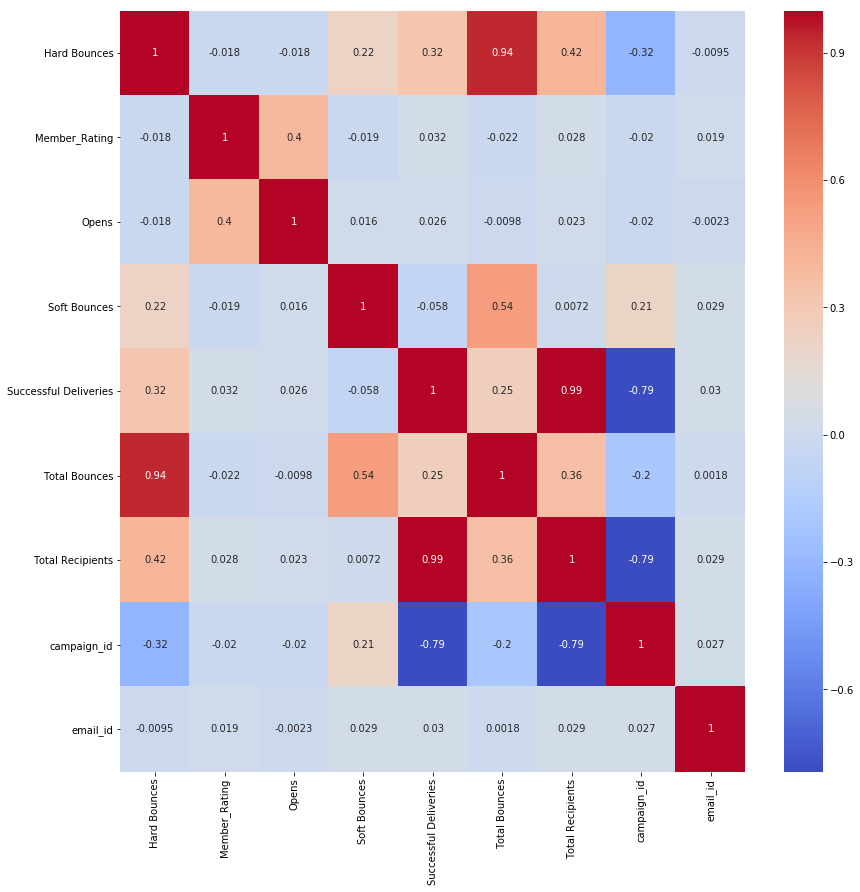

In [25]:
plt.subplots(figsize = (14, 14))
sns.heatmap(Complete_secure_df.corr(),
            cmap='coolwarm',
            annot=True)

### The above heatmap indicates a somewhat meaningful relationship between Member Rating and opens, and a clear attrition of recipients over, time, as our first communication sent in December and onwards resulted in a lot of initial unsubscribes.  We have since added more subscribers.  There is a clear relationship between Overall emails sent, and bounces, which is simply the nature of mass marketing emails.

Text(0.5, 1.0, 'Member Ratings Relationship With Metrics')

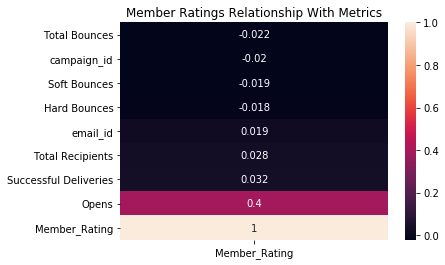

In [26]:
sns.heatmap(Complete_secure_df.corr()[['Member_Rating']].sort_values('Member_Rating'),
            annot=True).set_title("Member Ratings Relationship With Metrics")

Text(0.5, 1.0, 'Relationship of Successful Deliveries with Metrics')

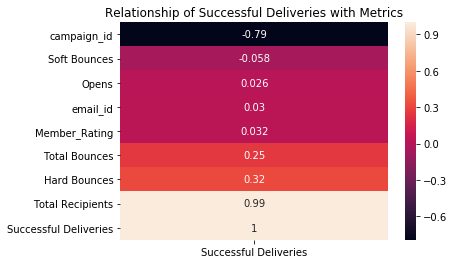

In [27]:
sns.heatmap(Complete_secure_df.corr()[['Successful Deliveries']].sort_values('Successful Deliveries'),
            annot=True).set_title("Relationship of Successful Deliveries with Metrics")

#### The above may imply that successful deliveries has the expected relationship with soft, but not hard bounces, due to both old emails needing to be cleared, and some hard spam filters.

#### Update - As I put chronologically newer data into my dataframe, those relationships with soft bounces and hard bounces flip - The total and hard bounce relationship between successful deliveries is predictably significant, at .25 and .32 respectively, but soft bounces has an ambivalent relationship.

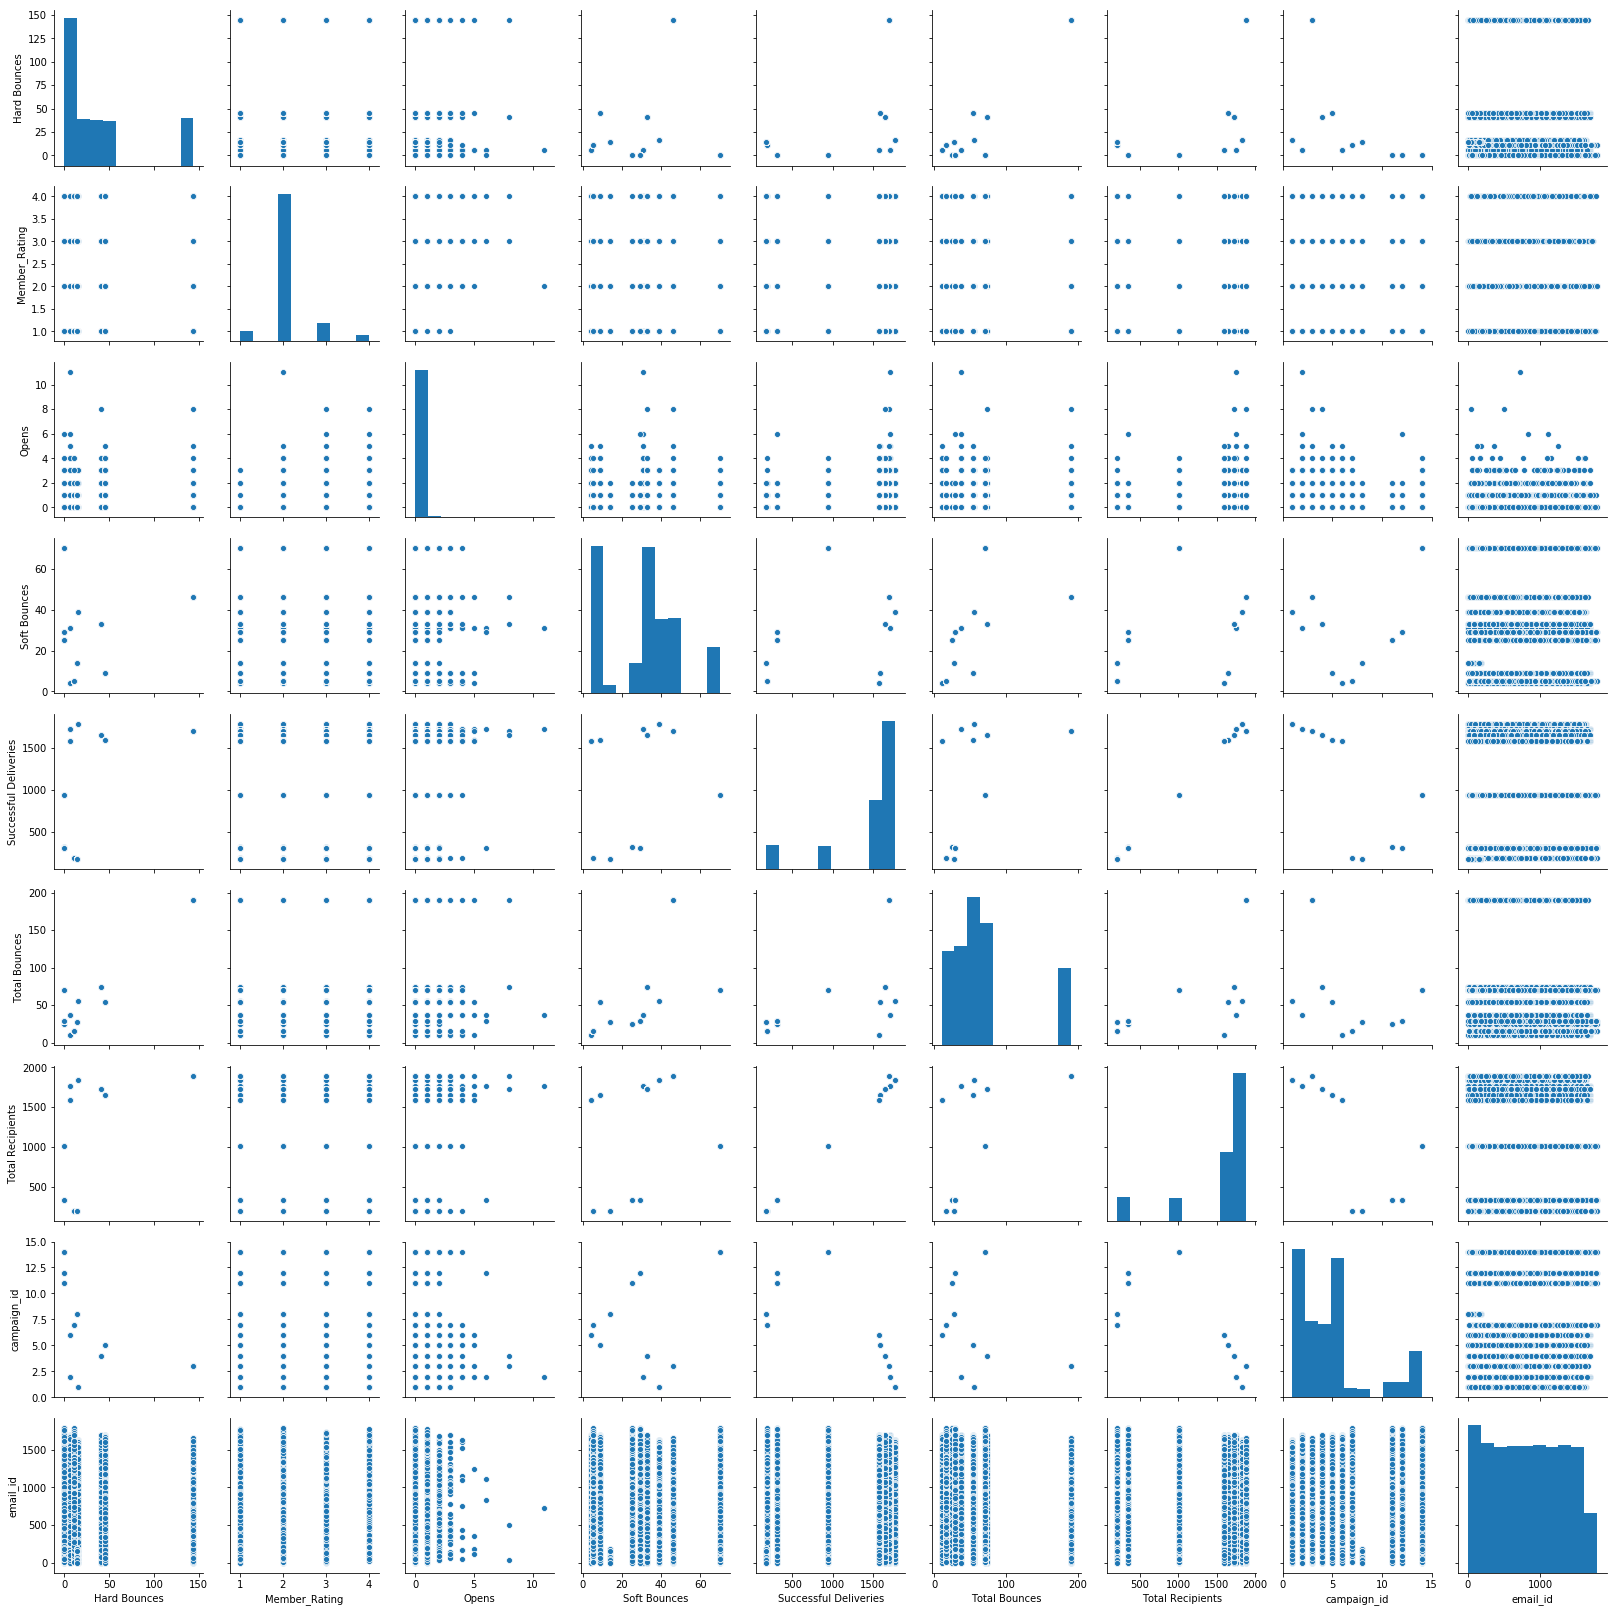

In [28]:
sns.pairplot(Complete_secure_df)

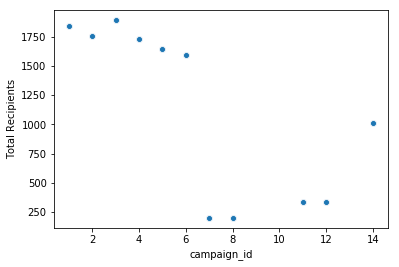

In [40]:
sns.scatterplot(x=Complete_secure_df["campaign_id"],
                y=Complete_secure_df["Total Recipients"])

this wonky looking partially negative relationship in the first couple points, with other similar patterns appearing in the set of pairplots above, demonstrates subscriber attrition early on when we first started sending out mass newsletters.

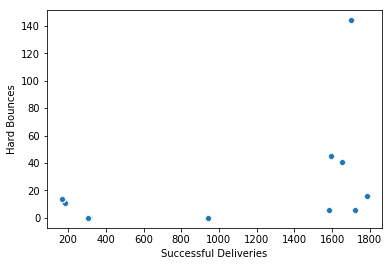

In [29]:
sns.scatterplot(Complete_secure_df["Successful Deliveries"],
            Complete_secure_df["Hard Bounces"])

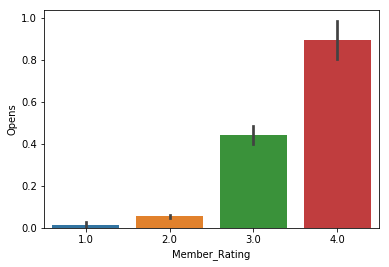

In [30]:
sns.barplot(x = Complete_secure_df["Member_Rating"],
            y = Complete_secure_df["Opens"])

In [31]:
#ax = Complete_secure_df.plot.bar(x= "Member_Rating", y= "Opens")

Text(0.5, 1.0, 'Member Ratings and Email Opens')

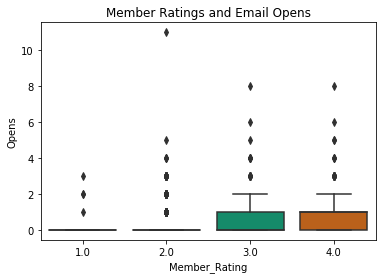

In [32]:
# Ratings are a function of member opens and clicks divided by emails sent to them
#https://organicweb.com.au/marketing/mailchimp-member-ratings/ 

sns.boxplot(Complete_secure_df['Member_Rating'],
            y = Complete_secure_df["Opens"],
            palette = "colorblind",
           ).set_title("Member Ratings and Email Opens")

<bound method Artist.set of <matplotlib.axes._subplots.AxesSubplot object at 0x12a8f0a20>>

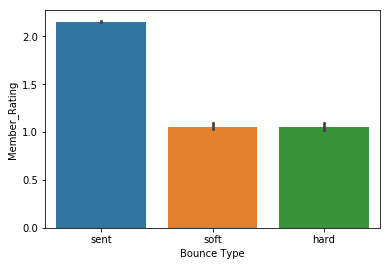

In [32]:
sns.barplot(Complete_secure_df['Bounce Type'],
            y = Complete_secure_df["Member_Rating"]).set

In [36]:
Complete_secure_df.isnull().sum()

Bounce Type              0
Hard Bounces             0
Member_Rating            0
Opens                    0
Soft Bounces             0
Successful Deliveries    0
Total Bounces            0
Total Recipients         0
campaign_id              0
email_id                 0
Subject                  0
dtype: int64

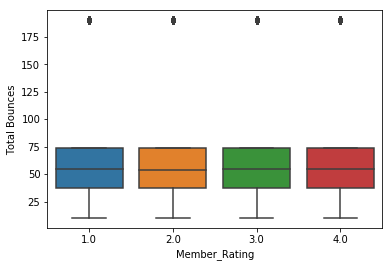

In [38]:
sns.boxplot(Complete_secure_df['Member_Rating'], y = Complete_secure_df["Total Bounces"])

### Let's generate a Wordcloud!

In [39]:
Subject_string = ''
for d in Complete_secure_df["Subject"]:
    Subject_string+=d

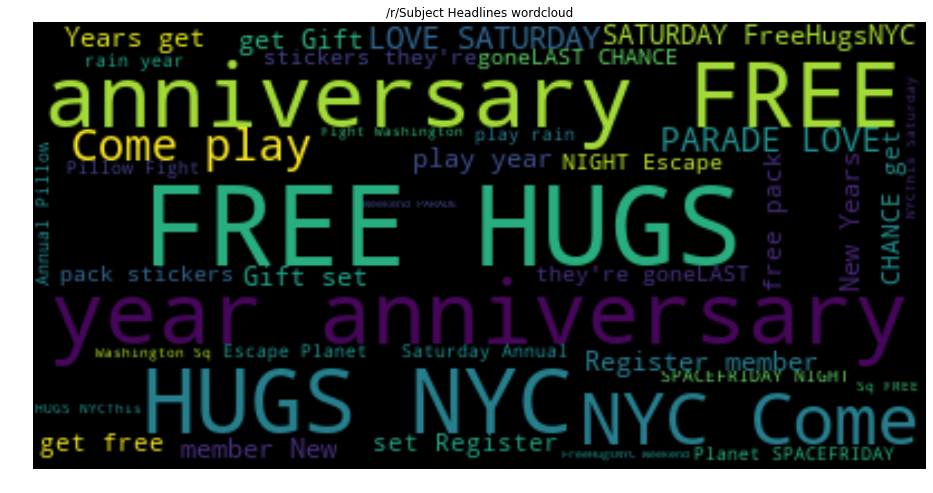

In [40]:
wordcloud = WordCloud(stopwords = stopwords.words('english'), max_font_size=50, max_words=80, background_color="black").generate(Subject_string)

plt.figure(figsize = (16, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("/r/Subject Headlines wordcloud")

plt.show()

## An Initial NLP model with Count Vectorization on our main target variables

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression

In [111]:
X = Complete_secure_df['Subject']

In [112]:
y = Complete_secure_df['Opens']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.3)

In [114]:
cv = CountVectorizer(max_features = 1940, stop_words = stopwords.words('english'))

In [132]:
X_traincv = cv.fit_transform(X_train)
X_testcv = cv.transform(X_test)

In [133]:
lr = LinearRegression()

In [134]:
model = lr.fit(X_traincv, y_train)

In [135]:
predictions = model.predict(X_testcv)

In [136]:
model.score(X_traincv, y_train)

0.0047911856092557326

In [137]:
model.score(X_testcv, y_test)

0.0024905621347526274

In [138]:
#Not very promising results so far.  Let's continue in the modeling notebook!

In [139]:
predictions

array([0.05150215, 0.09284497, 0.17800559, ..., 0.11864407, 0.13257243,
       0.09284497])

In [140]:
bag_of_words = cv.fit_transform(X)

In [141]:
bag_of_words.sum()

82498